# アイスクリーム統計学 with Python 第1章

第７回講義（2017年10月17日講義、10月20日課題提出締切）

このページは、<a href="http://kogolab.chillout.jp/elearn/icecream/index.html" target="_blank">アイスクリーム統計学にようこそ！</a>の内容をプログラミング言語 Python に合わせて書き直したものです。

<h1 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap1/sec0.html" target="_blank">第１章 散布図と相関</a></h1>

<P class="photo"><img src="image/icecream.jpg" width="172" height="179"></P>
<P>ここは、ショッピングモールにまもなく新規開店する「21アイスクリーム」チェーン店です。</P>
<P>大学生のアイ子ちゃんは、ここでアルバイトをすることにしました。</P>
<P class="photo"><img src="image/aiko-futsu.jpg" width="168" height="140"></P>
<P class=speech>───うん、まあ雰囲気のよさそうな店だな。しばらくバイトさせてもらおうっと</P>

<P>このバイトが、思いもかけない方向に展開するとは、まったく思っていなかったアイ子ちゃんでした。</P>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap1/sec1.html" target="_blank">1.1　最高気温と客数の関係</a></h2>

<P class="photo"><img src="image/tencho-futsu.jpg" width="130" height="145"></P>
<P class="speech">「やあやあ、きみが新しいバイトの人だね」</P>
<P class="speech">───はい、アイ子といいます。よろしくお願いします</P>
<P class="speech">「こちらこそ、よろしくね」</P>
<P>実は、この店長、数字が苦手なのです。</P>
<P class="speech">「アイ子ちゃん、さっそくで悪いんだけど。パソコンできるよね？」</P>
<P class="speech">───え？　まあ、操作するくらいならできますよ。でも、販売のバイトだと聞いたんですけど。</P>
<P class="speech">「もちろん販売もやってもらうんだけど、ちょっとだけ私の仕事も手伝ってくれないかな」</P>
<P class="speech">───は、はい。</P>
<P>すると、店長はこんなことをお願いしてきました。</P>
<P class="speech">「この店は３日後にオープンを控えているんだ。いったい、どれくらいの数のお客さんが来るのか。心配で、心配で。たくさん来すぎて、店があふれたらどうしようとか、バイトはあと何人くらい必要なのか、とか」</P>
<P class="speech">───だいたい、これくらいのお客が来るだろうというデータはないんですか？</P>
<P class="speech">「そう、それだよ。あるんだよ、うちはチェーン店だから、同じような規模のお店のデータをもらってきたのさ。これだ」</P>


[別のチェーン店の８月の客数データ（14日分）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream.txt)


<P class="speech">「これを元にして、お客の数を予想してくれないかな」</P>
<P class="speech">───うーん、なるほど。ちょうど大学でExcelを習っているところだし、ちょっとやってみようかな」</P>
<P class="speech">「ありがと～、アイ子ちゃん。助かるよ～」</P>

<P class="photo"><img src="image/tencho-ureshinaki.jpg" width="129" height="144"></P>

<h4 style="border-bottom: solid 1px black;">データを入力しよう</h4>

表　[別のチェーン店の８月の客数データ（14日分）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream.txt)
を用いて、以下のコードを実行してください。

In [6]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [7]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream.txt'

In [8]:
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'ice_cream.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'ice_cream.txt') # Python 3 の場合

('ice_cream.txt', <http.client.HTTPMessage at 0x104977898>)

In [9]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col1 = [] # ０列目の数字を格納する予定のリスト
col2 = [] # １列目の数字を格納する予定のリスト
col3 = [] # ２列目の数字を格納する予定のリスト
for i, line in enumerate(open('ice_cream.txt')): # ファイルを開いて一行一行読み込む
    if i == 0: # ０番目の行の場合
        continue # 次の行に行く
    c = line.split() # 行を空白文字で分割したものをcというリストに入れる
    col1.append(int(c[0])) # ０列目の単語を整数に変換してcol1に入れる
    col2.append(int(c[1])) # １列目の単語を整数に変換してcol2に入れる
    col3.append(int(c[2])) # ２列目の単語を整数に変換してcol3に入れる

<h4 style="border-bottom: solid 1px black;">折れ線グラフを描こう</h4>

入力したデータを使って、以下のコードを実行して折れ線グラフを描いてください。

In [10]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

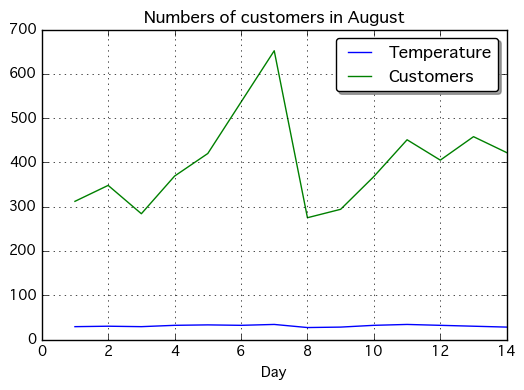

In [15]:
# 折れ線グラフを描く。
plt.plot(col1, col2, label="Temperature")
plt.plot(col1, col3, label="Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.title("Numbers of customers in August")
plt.xlabel("Day")
plt.grid()
plt.show()

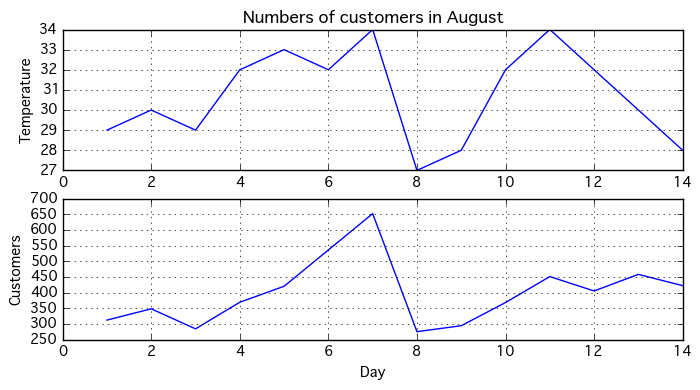

In [19]:
# 折れ線グラフを２つのサブプロットで描く。
plt.figure(figsize=(8, 4))

plt.subplot(2, 1, 1)
plt.plot(col1, col2)
plt.title('Numbers of customers in August')
#plt.xticks([])
#plt.xlabel('Day')
plt.ylabel('Temperature')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(col1, col3)
#plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Customers')
plt.grid()

plt.show()

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap1/sec2.html" target="_blank">1.2　散布図を描く</a></h2>

<P class="photo"><img src="image/aiko-ureshii.jpg" width="152" height="133"></P>
<P class="speech">───店長、できました。このグラフを見てください。だいたい200人から700人くらいの客数ですね。</P>
<P class="speech">「なに～、200から700だって？　そんなにおおざっぱな数じゃ、意味がないよ～」</P>
<P class="speech">───そんなこといったって……。</P>
<P class="speech">「お客の数とその日の最高気温は、なんか関係あるんじゃないかな。だって、暑ければ、アイスクリームを食べようっていう人が多くなるだろう。そう思って、最高気温のデータも付けてもらったんだけど」</P>
<P class="speech">───う～む。なるほど。客数と最高気温の関係か。それを見るためには、この折れ線グラフじゃダメだ。えーと、使えるのは……。あ、これかな？　散布図？</P>

<h4 style="border-bottom: solid 1px black;">散布図を描こう</h4>

以下のコードを実行してください。

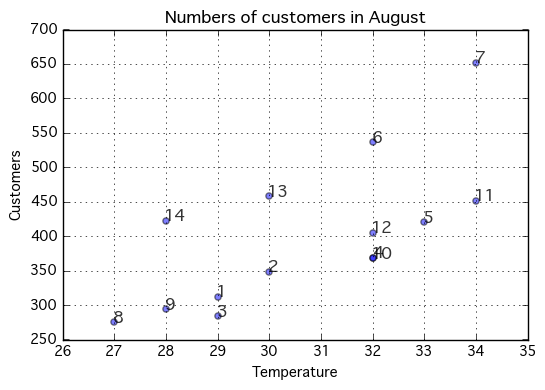

In [20]:
#散布図を描く。
plt.scatter(col2, col3, alpha=0.5)
plt.title("Numbers of customers in August")
plt.xlabel("Temperature")
plt.ylabel("Customers")
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()
plt.show()

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap1/sec3.html" target="_blank">1.3　散布図のパターン</a></h2>

<P class="photo"><img src="image/aiko-ureshii.jpg" width="152" height="133"></P>
<P class="speech">───店長、このグラフを見てください。最高気温と客数の間には、関係がありますね。最高気温が高くなればなるほど、客数は多くなるんですよ。</P>
<P class="speech">「おお、なるほど。確かに右上がりのグラフになっているね。ということは……」</P>
<P class="speech">───ということは？</P>
<P class="speech">「ということは、その日の最高気温がどれくらいになるかがわかれば、客数がだいたい予想できるということじゃないか？」</P>
<P class="speech">───あー、確かにそうですね。すてき。</P>

<h4 style="border-bottom: solid 1px black;">散布図のパターン</h4>

<p>散布図のパターンには、何種類かあります。</p>
<p>まず、ここで出てきた「X軸（横軸）の値が大きくなればなるほど、Y軸（縦軸）の値も大きくなるようなデータ」です。これを「<em>正の相関</em>」があるといいます。相関とは「お互いに関係がある」という意味です。グラフではこのようになります。</p>
<p class="photo"><img src="image/sokanzu1.jpg" width="237" height="268"></p>
<p>次に、それとは逆に「X軸の値が大きくなればなるほど、Y軸の値は小さくなるようなデータ」です。これを「<em>負の相関</em>」があるといいます。グラフではこのようになります。</p>
<p class="photo"><img src="image/sokanzu2.jpg" width="236" height="264"></p>
<p>最後に、正の相関も負の相関もないもの、つまり「<em>無相関</em>」です。「X軸の値と、Y軸の値に明確な関係がない」ということです。グラフではこのようになります。</p>
<p class="photo"><img src="image/sokanzu3.jpg" width="232" height="261"></p>

<h4 style="border-bottom: solid 1px black;">散布図をよく見よう</h4>
<p class="photo"><img src="image/tencho-muzukashii.jpg" width="127" height="138"></p>
<P class="speech">「この散布図を使って、だいたいの客数が予想できるな。よし。もしその日の最高気温が30度だったら……　あれ？」</P>
<P class="speech">───店長、どうしました？</P>
<P class="speech">「アイ子ちゃん、この散布図の30度のところを見るとね。このデータグループと、このデータグループが分かれているみたいなんだよ。これはなぜかなあ？」</P>
<P class="photo"><img src="image/graph5.jpg" width="379" height="297"></P>
<P class="speech">───ちょっと調べてみます。ふむふむ。これは、曜日による影響ですね。上のグループは、土曜と日曜のデータなんですよ。それで、下のグループは、平日のデータ。だから、土日か、平日かによって、予想が変わってきますね。</P>
<P class="speech">「なるほどー。散布図を描いてからも、データをよく見なくちゃいけないね」</P>
<P class="speech">───そうですね。常にデータに立ち戻って調べることが大切ですね。</P>

<h2 STYLE="background: #c2edff;padding: 0.5em;"><a href="http://kogolab.chillout.jp/elearn/icecream/chap1/sec4.html" target="_blank">1.4　（応用編）駅からの距離と客数の関係</a></h2>

<P>翌日のこと……</P>
<P class="photo"><img src="image/tencho-komaru.jpg" width="126" height="139"></P>
<P class="speech">「困った、困った」</P>
<P class="speech">───店長、どうしたんですか？</P>
<P class="speech">「アイ子ちゃん、昨日の散布図で、客数の予想ができると思ったんだけどね。あれは、そのお店でのデータだから、この店にそのまま当てはまるとは限らないんじゃないかと思うんだよ」</P>
<P class="speech">───なるほど、お店の規模が違えば、客数も違いますからね。お店の規模についてのデータはないんですか？</P>
<P class="speech">「ああ、そうか。お店の規模は、人通りの多さで決まるんだよ。で、人通りの多さは、最寄りの駅からどれくらい近いかによって決まるんだ。そういわれてみれば、こんなデータをもらっていたよ」</P>

[店舗別８月の平均客数データ（12店舗）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt)

<P class="speech">───よし、このデータを分析すれば、何かわかるかもしれない。コーンも手伝って。</P>
<P class="photo"><img src="image/corn.jpg" width="120" height="91"></P>

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題1.4</h4>

[店舗別８月の平均客数データ（12店舗）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt) をダウンロードし、散布図を描いてください。その上で、駅から250メートルの店の客数を予測してください。

In [9]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。

In [10]:
#散布図を描く。

<h4 style="border-bottom: solid 1px black;">散布図からわかること</h4>
<p class="photo"><img src="image/aiko-hirameku.jpg" width="185" height="135"></p>
<P class="speech">───あれ、前の散布図とは違って、右下がりになっている。</P>
<P class="speech">「どれどれ、本当だ。ということは、距離が離れれば離れるほど、平均客数は減るということだね」</P>
<P class="speech">───そうだ。「負の相関」なんだ。店長、このお店は駅からどれくらいの距離にありますか？</P>
<P class="speech">「このお店は駅から250メートルだよ、アイ子ちゃん」</P>
<P class="speech">───そうすると、この散布図から予測すると、平均客数は、これぐらいになると思いますよ。</P>

<h2 STYLE="background: #c2edff;padding: 0.5em;">アイスクリーム統計学 第１章 課題</h2>

__課題1.4__ を解いて、指定のメールアドレスまでメールしてください。メール送信後は、エラーが帰ってきてないことを確認してください（メールアドレスを間違える人がときどき居ます）。
* 締切：10月20日（今すぐでなくても結構です）
* メールタイトル：「アイスクリーム統計学 第１章」
* 学籍番号と氏名を明記すること。
* 感想などがあれば書いてくれると嬉しいです。次回以降の講義の改善につながるかも知れません。

In [24]:
# アイスクリーム統計学 第１章 課題

<h2 STYLE="background: #c2edff;padding: 0.5em;">終わったら、<a href="IceCreamStatistics02.ipynb">第２章：相関係数</a> に進んでください。</h2>
（2017年10月17日講義、10月20日課題提出締切）